### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Data Preprocessing

In [3]:
#Changing Column Names
df.columns=['CustomerID','Gender','Age','Annual Income','Spending Score']
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Droping Columns
df=df.drop(columns={'CustomerID','Gender'})
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [6]:
#Training Model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

### 3. Creating Dendogram using Single,Average&Complete linkage

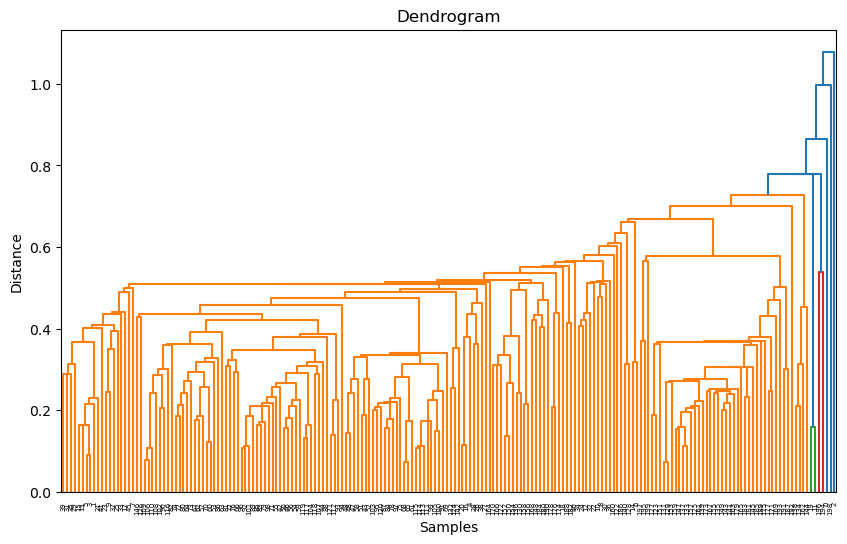

In [7]:
#Creating the Dendogram
linked=linkage(df_scaled,method='single')
plt.figure(figsize=(10,6))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

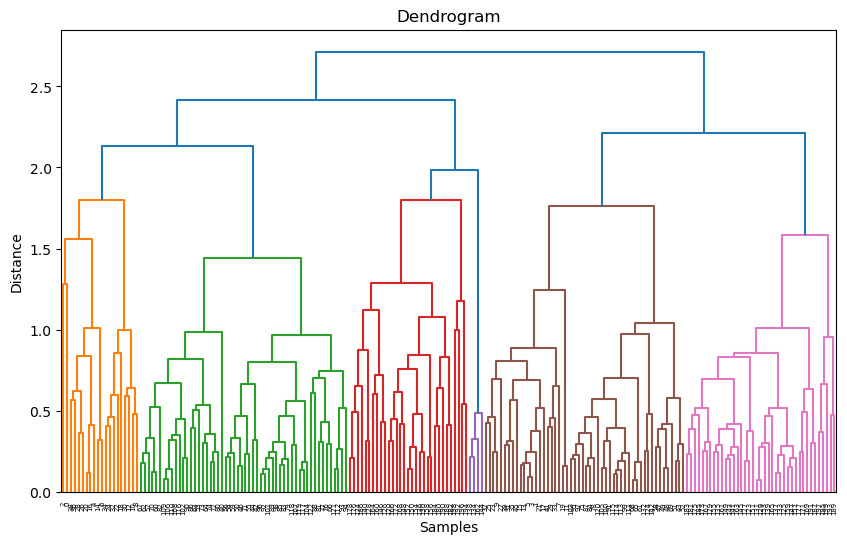

In [8]:
#Creating the Dendogram
linked=linkage(df_scaled,method='average')
plt.figure(figsize=(10,6))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

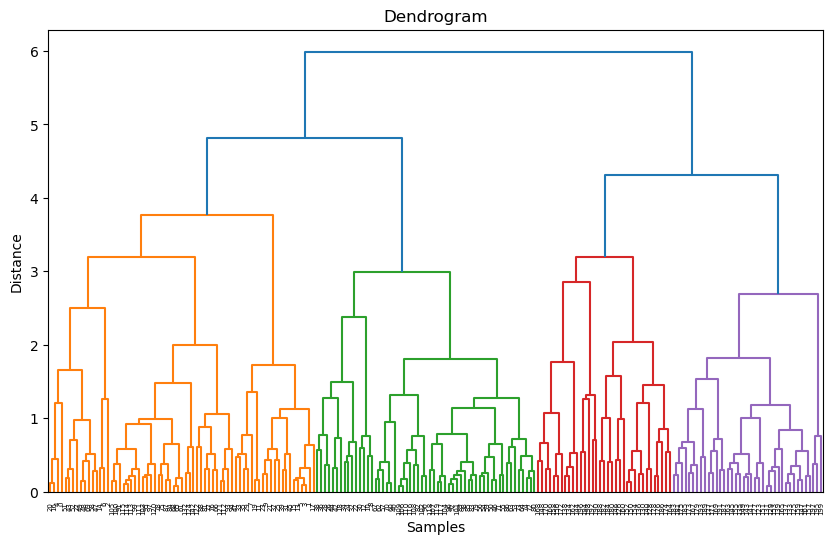

In [9]:
#Creating the Dendogram
linked=linkage(df_scaled,method='complete')
plt.figure(figsize=(10,6))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### 4. Training Model

In [10]:
#Training Model
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5)
model.fit(df_scaled)
labels=model.labels_
print(labels)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 1 0 4 0 4 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 0 2 1 2 3 2 3 2 0 2 0 2 3 2 0 2 3 2 0 2 0 2 1 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


### 5. Visualization

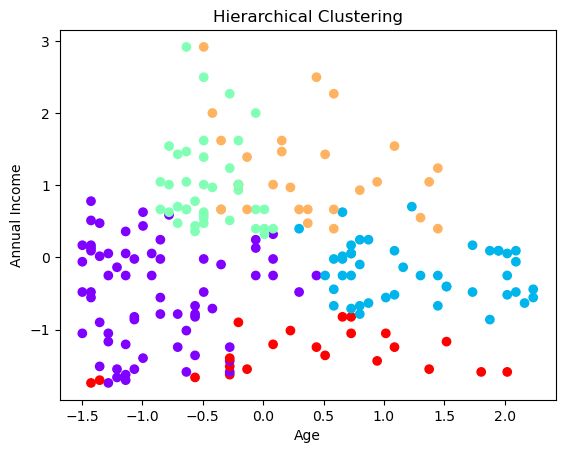

In [11]:
#Visualization
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=labels,cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

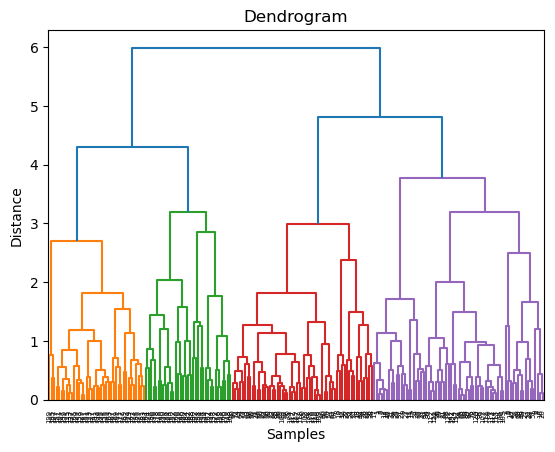

In [12]:
linked=linkage(df_scaled,method='complete')
plt.Figure(figsize=(10,5))
dendrogram(linked)
plt.axhline(y=150,color='b',linestyle='--')
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [13]:
#Find the number of clusters using threshold
from scipy.cluster.hierarchy import fcluster
clusters=fcluster(linked,t=150,criterion='distance')
n_clusters=len(set(clusters))
print(f"Number of clusters:{n_clusters}")

Number of clusters:1


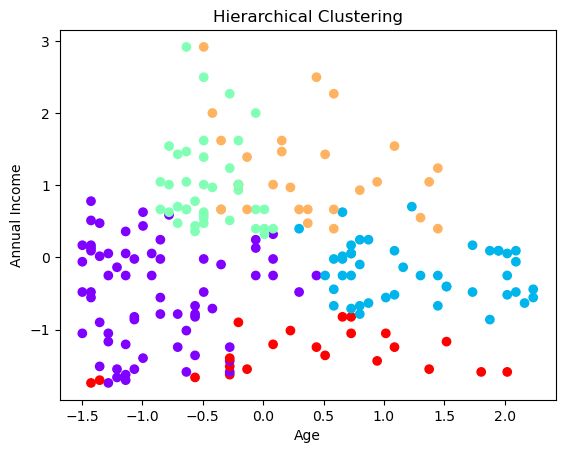

In [14]:
#Visualization
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=labels,cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,linkage='ward')
model.fit(df)
df["Cluster"]=model.labels_
df.head()

,Age,Annual Income,Spending Score,Cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [16]:
from sklearn.cluster import AgglomerativeClustering
df_scaled=pd.DataFrame(df_scaled,columns=['Age','Annual Income','Spending Score'])
model=AgglomerativeClustering(n_clusters=5,linkage='ward')
model.fit(df_scaled)
df_scaled["Cluster"]=model.labels_
df_scaled

,Age,Annual Income,Spending Score,Cluster
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,3
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,3


In [19]:
import joblib
joblib.dump(model,'agglomerative_model.pkl')

['agglomerative_model.pkl']

In [17]:
#Saving File
df.to_csv("clustered_mall_customers.csv",index=False)

In [18]:
df=pd.read_csv("clustered_mall_customers.csv")
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)